In [16]:
import pandas as pd
from cosas_spotipy import *

In [32]:
df = pd.read_csv("Spotify Weekly.csv")
df = df.drop(["url","time_signature","key","instrumentalness"], axis = 1)
# eliminamos el 2016
df = df[df.year > 2016]
df.head(3)

,position,year,start,end,track_name,artist,streams,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms
400,136,2017,2017-01-06,2017-01-13,September Song,JP Cooper,3534190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,135,2017,2017-01-06,2017-01-13,"I See Fire - From ""The Hobbit - The Desolation...",Ed Sheeran,3539885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,134,2017,2017-01-06,2017-01-13,"Me, Myself & I",G-Eazy,3552258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
len(df)

51800

In [30]:
df.isnull().sum()

,position,year,start,end,track_name,artist,streams,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms
400,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True
401,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True
402,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True
403,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True
404,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52195,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True
52196,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True
52197,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True
52198,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True


In [31]:
df.head()

,position,year,start,end,track_name,artist,streams,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms
400,136,2017,2017-01-06,2017-01-13,September Song,JP Cooper,3534190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,135,2017,2017-01-06,2017-01-13,"I See Fire - From ""The Hobbit - The Desolation...",Ed Sheeran,3539885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,134,2017,2017-01-06,2017-01-13,"Me, Myself & I",G-Eazy,3552258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,129,2017,2017-01-06,2017-01-13,Lean On (feat. MØ & DJ Snake),Major Lazer,3629879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404,132,2017,2017-01-06,2017-01-13,Swang,Rae Sremmurd,3579757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Se votan los nulos
df = df.dropna(axis = 0)

In [25]:
len(df)

0

In [26]:
df[['danceability',
    'energy',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'liveness',
    'valence',
    'tempo',
    'duration_ms']].mean()

danceability   NaN
energy         NaN
loudness       NaN
mode           NaN
speechiness    NaN
acousticness   NaN
liveness       NaN
valence        NaN
tempo          NaN
duration_ms    NaN
dtype: float64

In [27]:
df[['danceability',
    'energy',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'liveness',
    'valence',
    'tempo',
    'duration_ms']].std()

danceability   NaN
energy         NaN
loudness       NaN
mode           NaN
speechiness    NaN
acousticness   NaN
liveness       NaN
valence        NaN
tempo          NaN
duration_ms    NaN
dtype: float64

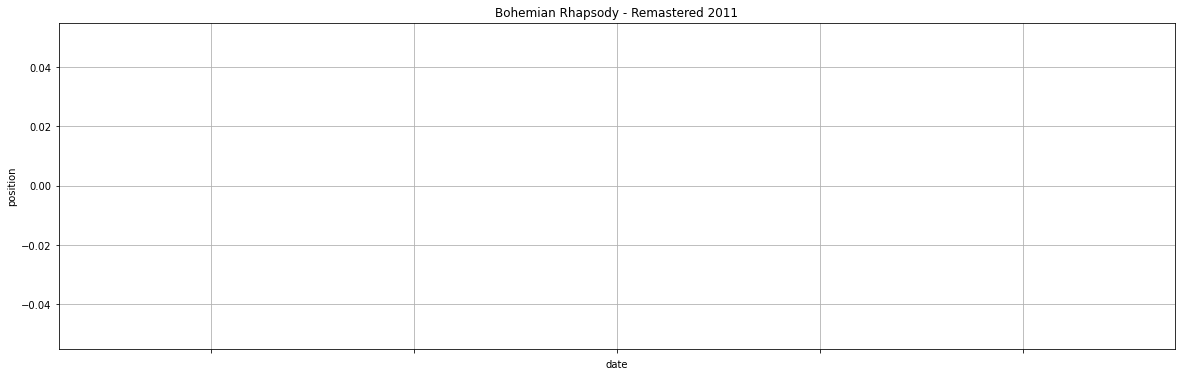

In [28]:
graficar(df, "Bohemian Rhapsody - Remastered 2011" , "position")

In [10]:
len(df[df.year == 2021])/200

52.0

Text(0, 0.5, 'streams')

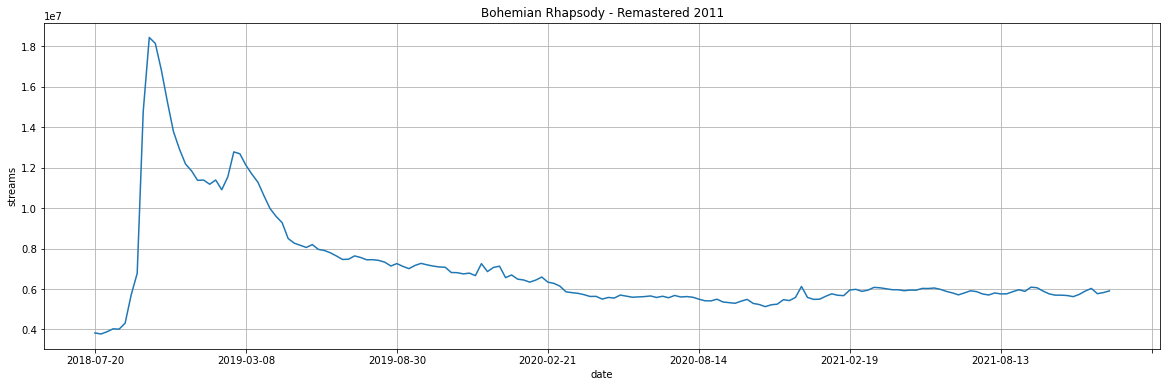

In [11]:

name = "Bohemian Rhapsody - Remastered 2011"
sng = df[df.track_name == name]
sng.index = sng.start
ax = sng["streams"].plot(title = name, grid = True, figsize = (20,6))
ax.set_xlabel("date")
ax.set_ylabel("streams")

In [12]:
sng

,Unnamed: 0,position,year,start,end,track_name,artist,streams,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms
start,,,,,,,,,,,,,,,,,,
2018-07-20,16470,199,2018,2018-07-20,2018-07-27,Bohemian Rhapsody - Remastered 2011,Queen,3829831,0.414,0.404,-9.928,0.0,0.0499,0.271,0.3,0.224,71.105,354320.0
2018-07-27,16659,189,2018,2018-07-27,2018-08-03,Bohemian Rhapsody - Remastered 2011,Queen,3778619,0.414,0.404,-9.928,0.0,0.0499,0.271,0.3,0.224,71.105,354320.0
2018-08-31,17666,196,2018,2018-08-31,2018-09-07,Bohemian Rhapsody - Remastered 2011,Queen,3887047,0.414,0.404,-9.928,0.0,0.0499,0.271,0.3,0.224,71.105,354320.0
2018-09-07,17858,188,2018,2018-09-07,2018-09-14,Bohemian Rhapsody - Remastered 2011,Queen,4032727,0.414,0.404,-9.928,0.0,0.0499,0.271,0.3,0.224,71.105,354320.0
2018-09-14,18059,189,2018,2018-09-14,2018-09-21,Bohemian Rhapsody - Remastered 2011,Queen,4015563,0.414,0.404,-9.928,0.0,0.0499,0.271,0.3,0.224,71.105,354320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-26,51288,166,2021,2021-11-26,2021-12-03,Bohemian Rhapsody - Remastered 2011,Queen,5903399,0.414,0.404,-9.928,0.0,0.0499,0.271,0.3,0.224,71.105,354320.0
2021-12-03,51491,169,2021,2021-12-03,2021-12-10,Bohemian Rhapsody - Remastered 2011,Queen,6030365,0.414,0.404,-9.928,0.0,0.0499,0.271,0.3,0.224,71.105,354320.0
2021-12-10,51656,186,2021,2021-12-10,2021-12-17,Bohemian Rhapsody - Remastered 2011,Queen,5770618,0.414,0.404,-9.928,0.0,0.0499,0.271,0.3,0.224,71.105,354320.0
